# Final Project - Pop and Rap Music Comparison Through Data

### Kelsey Toporski, ktops

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re 
from bs4 import BeautifulSoup
import spacy
nlp = spacy.load('en')
from spacy.lang.en.stop_words import STOP_WORDS
np.array(STOP_WORDS)
from collections import Counter

Loading the in the Billboard lyrics for the past 50 years of top songs:

In [2]:
# had to use special encoding to get my data to upload all the chars correctly - UTF-8 didn't work
billboard = pd.read_csv('billboard_lyrics_1964_2015.csv', encoding = 'ISO-8859-1')
billboard.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


Scraping lyrics from Genius's website

to get the to the lyrics page of a song on genius:
https://genius.com/Artist-name-song-name-lyrics
do not include apostrophe's, only capitalize the first letter of the artist's name

In [3]:
# writing a function that will take in the song name and artist name and clean both (no symbols or punctuation, lowercase)
# so that i can create a URL that will lead me to the lyrics of the song on genius
def get_url(song_name, artist_name):
    song_name = song_name.replace("'", "")
    song_name = song_name.replace(".", "")
    song_name = re.sub(r'([^\w\s])|_+', ' ', song_name)
    if(song_name[-1] == ' '):
        song_name = song_name[:-1]
    song_name = re.sub(' +', ' ', song_name)
    song_name = song_name.lower()
    song_name = song_name.replace(" ", "-")

    artist_name = artist_name.replace("'", "")
    artist_name = artist_name.replace(".", "")
    artist_name = re.sub(r'([^\w\s])|_+', ' ', artist_name)
    if(artist_name[-1] == ' '):
        artist_name = artist_name[:-1]
    artist_name = re.sub(' +', ' ', artist_name)
    artist_name = artist_name.lower()
    artist_name = artist_name.replace(" ", "-")
    artist_name = artist_name[0].upper() + artist_name[1:]

    final_url = 'https://genius.com/' + artist_name + '-' + song_name + '-lyrics'
    
    return final_url

getting lyrics from online fro the url we made

In [4]:
# using beautiful soup to scrape the lyrics off of the genius page
def get_lyrics(song_url):
    url = song_url
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser")

    lyrics = html.find("div", class_="lyrics").get_text()
    return lyrics

cleaning the lyrics

In [5]:
# cleaning the lyrics (lowercase, no punctuation or symbols of any kind, no newlines, etc.)
def clean_lyrics(lyrics):
    lyrics = re.sub(r'\[.+?\]', '', lyrics)
    lyrics_lower = lyrics.lower()
    lyrics_lower = re.sub('\n', ' ', lyrics_lower)
    lyrics_lower_no_punct = re.sub(r'[^\w\s]+', '', lyrics_lower)
    lyrics_finished = re.sub(' +', ' ', lyrics_lower_no_punct)
    if(lyrics_finished[-1] == ' '):
        lyrics_finished = lyrics_finished[:-1]
    if(lyrics_finished[0] == ' '):
        lyrics_finished = lyrics_finished[1:]
    return lyrics_finished

testing the functions

In [6]:
# testing the output on a song i know the lyrics to
fleet = get_url('Helplessness Blues', 'Fleet Foxes')
foxes = get_lyrics(fleet)
clean_lyrics(foxes)

'i was raised up believing i was somehow unique like a snowflake distinct among snowflakes unique in each way you can see and now after some thinking id say id rather be a functioning cog in some great machinery serving something beyond me but i dont i dont know what that will be ill get back to you someday soon you will see whats my name whats my station oh just tell me what i should do i dont need to be kind to the armies of night that would do such injustice to you or bow down and be grateful and say sure take all that you see to the men who move only in dimly lit halls and determine my future for me and i dont i dont know who to believe ill get back to you someday soon you will see if i know only one thing its that everything that i see of the world outside is so inconceivable often i barely can speak yeah im tonguetied and dizzy and i cant keep it to myself what good is it to sing helplessness blues why should i wait for anyone else and i know i know you will keep me on the shelf 

In [7]:
# combining all those functions into one big function
def all_of_the_above(song, artist):
    url = get_url(song, artist)
    lyrics = get_lyrics(url)
    return clean_lyrics(lyrics)

how many unique words are in crazy in love by beyonce

In [8]:
# yee = all_of_the_above('Crazy In Love', 'Beyonce')
# unique_words = set(yee.split(' '))
# len(unique_words)

put it all in a dataframe:

In [9]:
# putting all the names form the rap 100 list into a csv, loading that in
# had to use the quotechar thing so i could keep my apostrophes in place
rap100 = pd.read_csv('hot_100_rap.csv', quotechar = "\"")

In [10]:
# adding all the lyrics to the songs into the dataframe
rap100['lyrics'] = rap100[["song_name","artist_name"]].apply(lambda x: all_of_the_above(*x), axis=1)

In [11]:
rap100.head(20)

,song_name,artist_name,lyrics
0,All Of The Lights,Kanye West,all of the lights lights all of the lights tur...
1,No Lie,2 Chainz,eardrummers mike will madeit yah tru 2 chainz ...
2,Aston Martin Music,Rick Ross,oh lets pull the 2seater out baby its where ev...
3,Loungin (Who Do Ya Luv),LL Cool J,ummgo head daddy we doing it with llaughsgo he...
4,O.P.P.,Naughty By Nature,arm me with harmony dave drop a load on em opp...
5,Heartless,Kanye West,in the night i hear em talk the coldest story ...
6,Player's Ball,OutKast,man the scene was so thick lowriders 77 sevill...
7,Holla Holla,Ja Rule,holla holla all my niggas thats ready to get d...
8,"Left, Right, Left",Drama,chorus drama left left left left left right le...
9,Call me D-Nice,D-Nice,my name is d nice my name is d nice my name my...


In [12]:
# testing what i wanted to do on the whole set to one song first
fleet_blob = all_of_the_above('Helplessness Blues', 'Fleet Foxes')
fleet_blob = fleet_blob.split()

fleet_nostop = list()
for word in fleet_blob:
    if word not in STOP_WORDS:
        fleet_nostop.append(word)

In [13]:
Counter(fleet_nostop).most_common(10)

[('id', 6),
 ('dont', 5),
 ('know', 5),
 ('im', 5),
 ('ill', 4),
 ('someday', 4),
 ('soon', 4),
 ('orchard', 4),
 ('work', 4),
 ('till', 4)]

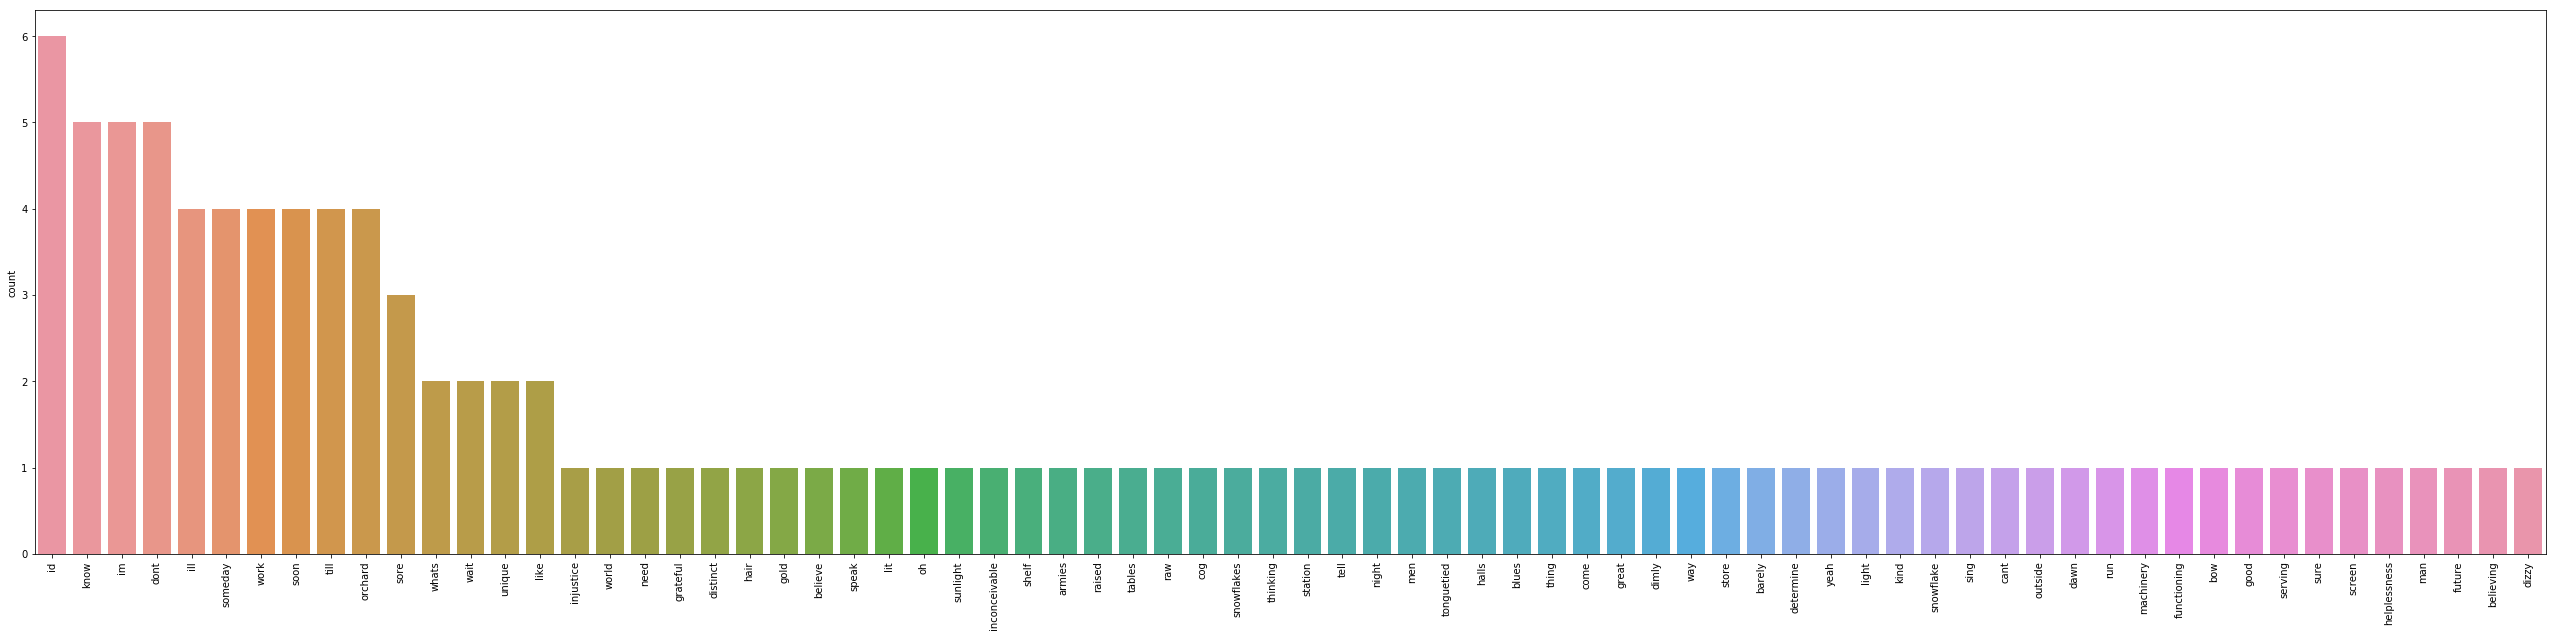

In [14]:
plt.figure(figsize=(45,10))
sns.countplot(fleet_nostop, order=pd.Series(fleet_nostop).value_counts().index)
# sns.countplot(fleet_nostop, order=[counted[0] for counted in Counter(fleet_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

In [15]:
pop_blob = billboard['Lyrics'].str.cat()
pop_blob = pop_blob.split()

In [16]:
pop_nostop = list()
for word in pop_blob:
    if word not in STOP_WORDS:
        pop_nostop.append(word)

In [17]:
d1 = Counter(pop_nostop).most_common(20)

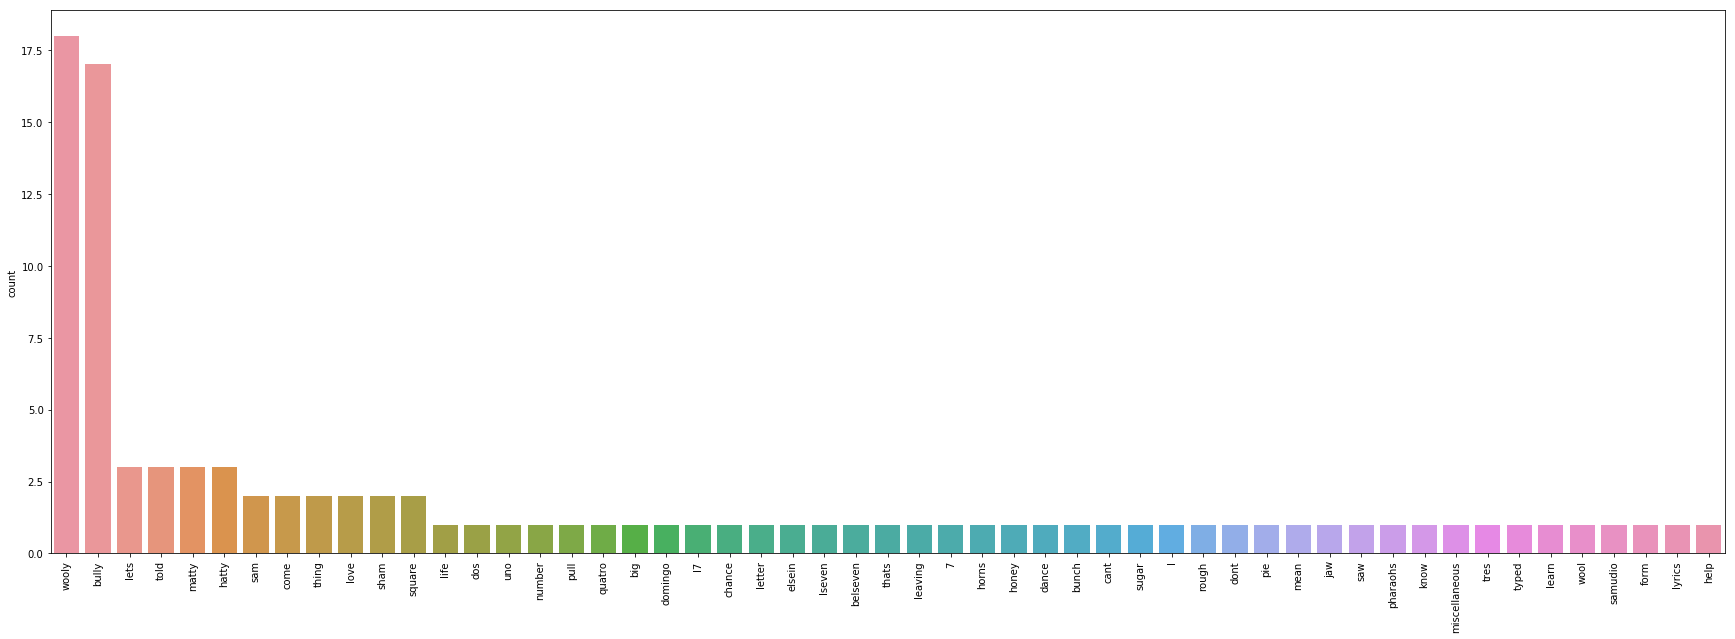

In [18]:
# decided this didn't really show anything important
plt.figure(figsize=(30,10))
pop_nostop1 = pop_nostop[:100]
sns.countplot(pop_nostop1, order=pd.Series(pop_nostop1).value_counts().index)
# sns.countplot(pop_nostop, order=[counted[0] for counted in Counter(pop_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

In [19]:
# adding all the words of the rap songs together
rap_blob = rap100['lyrics'].str.cat()
rap_blob = rap_blob.split()

In [20]:
# removing stopwords
rap_nostop = list()
for word in rap_blob:
    if word not in STOP_WORDS:
        rap_nostop.append(word)

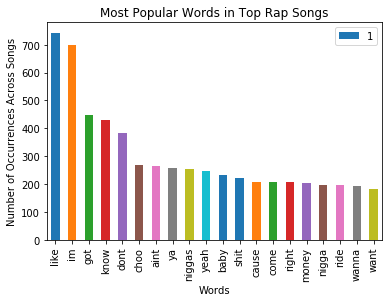

In [21]:
# plotting the most common words across top rap songs
d = Counter(rap_nostop).most_common(20)
df = pd.DataFrame(d)
ax = df.plot.bar(x=0, y=1)
plt.title('Most Popular Words in Top Rap Songs')
plt.xlabel('Words')
plt.ylabel('Number of Occurrences Across Songs')
plt.show()

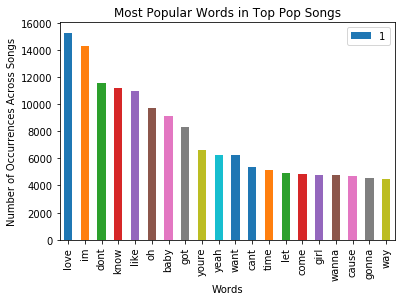

In [22]:
# same as above, repeated with pop
d1 = Counter(pop_nostop).most_common(20)
df1 = pd.DataFrame(d1)
ax1 = df1.plot.bar(x=0, y=1)
plt.title('Most Popular Words in Top Pop Songs')
plt.xlabel('Words')
plt.ylabel('Number of Occurrences Across Songs')
plt.show()

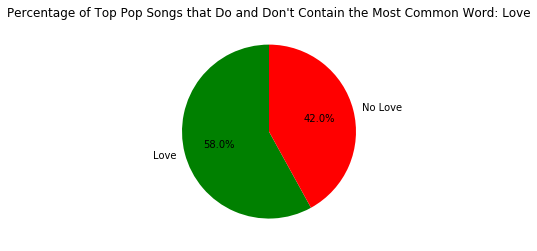

In [23]:
# how many of the top songs had the top word in it - pop
count = 0

lyrics_list = list(billboard['Lyrics'])

total = len(lyrics_list)

for song in lyrics_list:
    if str(song).find("love") != -1:
        count += 1
    
slices_hours = [count, total - count]
activities = ['Love', 'No Love']
colors = ['g', 'r']
plt.title('Percentage of Top Pop Songs that Do and Don\'t Contain the Most Common Word: Love')
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [24]:
# what's the overlap between the two? - what are the most common words that appear in both?
d = Counter(rap_nostop).most_common(20)
rap_list = list(d)

d1 = Counter(pop_nostop).most_common(20)
pop_list = list(d1)

In [25]:
rap_list_words = []
for i in range(len(rap_list)):
    rap_list_words.append(rap_list[i][0])
    
pop_list_words = []
for i in range(len(pop_list)):
    pop_list_words.append(pop_list[i][0])

In [26]:
both_list_words = []

for i in range(len(pop_list_words)):
    for j in range(len(rap_list_words)):
        if pop_list_words[i] == rap_list_words[j]:
            both_list_words.append(pop_list_words[i])
            
both_list_words

['im',
 'dont',
 'know',
 'like',
 'baby',
 'got',
 'yeah',
 'want',
 'come',
 'wanna',
 'cause']

In [27]:
# make a tuple of 3: word, num of word in pop, num of word in rap x 20 (for scale)
biggy = []

# have to get the indices of these words in their original lists
pop_list_in = []
for i in range(len(both_list_words)):
    for j in range(len(pop_list)):
        if both_list_words[i] == pop_list[j][0]:
            pop_list_in.append(j)    

rap_list_in = []
for i in range(len(both_list_words)):
    for j in range(len(rap_list)):
        if both_list_words[i] == rap_list[j][0]:
            rap_list_in.append(j)    

for i in range(len(both_list_words)):
    x = (both_list_words[i], pop_list[pop_list_in[i]][1], (rap_list[rap_list_in[i]][1])*20)
    biggy.append(x)

In [28]:
biggy

[('im', 14275, 14000),
 ('dont', 11586, 7660),
 ('know', 11166, 8600),
 ('like', 10949, 14860),
 ('baby', 9093, 4640),
 ('got', 8289, 8920),
 ('yeah', 6252, 4960),
 ('want', 6214, 3640),
 ('come', 4866, 4180),
 ('wanna', 4767, 3840),
 ('cause', 4691, 4180)]

In [29]:
df = pd.DataFrame(biggy, columns=['word', 'pop_num', 'rap_num_x20'])
df.set_index('word', inplace=True)
df

,pop_num,rap_num_x20
word,,
im,14275,14000
dont,11586,7660
know,11166,8600
like,10949,14860
baby,9093,4640
got,8289,8920
yeah,6252,4960
want,6214,3640
come,4866,4180


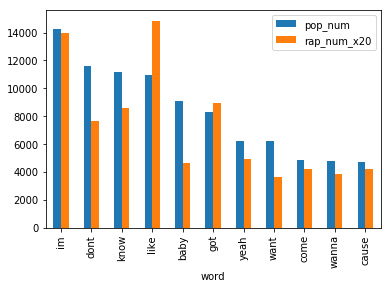

In [30]:
df.plot(kind='bar')
plt.show()

In [31]:
# how many unique words are there in all the rap songs
rappy = rap100['lyrics'].str.cat()
unique_words = set(rappy.split(' '))
len(unique_words)

6169

In [32]:
# how many unique words are there in all the pop songs
poppy = billboard['Lyrics'].str.cat()
unique_words = set(poppy.split(' '))
len(unique_words)

42340